# Project : Development of application web on streamlit who forecasting price of house 

### Objectives :  
                -Identify paterns and trends to predict the price of house on the Real Estate at Boston(USA).
                -Develop a model to forecast de manière automatique la valeur médiane des logements occupés par leur propriétaire.
                -Evaluate the model's perfomance
                -Implement in the app the model forecasting

Dataset
       source : https://www.kaggle.com/datasets/altavish/boston-housing-dataset
       
        size : The Boston housing dataset contains 506 observations and 14 variables

Description variables :

CRIM : Taux de criminalité par habitant par ville.

ZN : Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.

INDUS : Proportion de surfaces commerciales non détaillantes par ville.

CHAS : Variable binaire indiquant si le logement est situé près de la rivière Charles (1 = près, 0 = loin).

NOX : Concentration d'oxydes nitriques (pollution de l'air).

RM : Nombre moyen de pièces par logement.

AGE : Proportion de logements occupés par leur propriétaire construits avant 1940.

DIS : Distance pondérée jusqu'à cinq centres d'emploi de Boston.

RAD : Indice d'accessibilité aux autoroutes.

TAX : Taux d'imposition foncière pour 100 000 dollars de valeur.

PTRATIO : Ratio élèves/enseignants par ville.

B : Proportion de personnes afro-américaines par ville, calculée par la formule 

LSTAT : Pourcentage de la population considérée comme ayant un statut socio-économique faible.

MEDV : Valeur médiane des logements occupés par leur propriétaire, en milliers de dollars.

In [20]:
# Import the library and dataset
import pandas as pd 
import numpy as np

data = pd.read_csv('HousingData.csv')

## 1- DATA EXPLORATION

In [21]:
# Vérifions les infos du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [22]:
# Vérifions les 5 premières lignes
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [23]:
# Vérifier les doublons 
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [24]:
# Vérifions le nombre de valeurs manquantes par colonne
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [25]:
# Correction des valeurs manquantes

# Moyenne sur nos colonnes numériques
data["AGE"] = data["AGE"].fillna(data["AGE"].mean())
data["ZN"] = data["ZN"].fillna(data["ZN"].mean())
data["INDUS"] = data["INDUS"].fillna(data["INDUS"].mean())

# Médiane (moins sensible aux outliers)
data["CRIM"] = data["CRIM"].fillna(data["CRIM"].median())
data["LSTAT"] = data["LSTAT"].fillna(data["LSTAT"].median())

# Mode (pour la variable catégorielle)
data["CHAS"] = data["CHAS"].fillna(data["CHAS"].mode()[0])

In [26]:
# Vérifions à nouveau notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 2-Data Analysis

In [30]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,11.211934,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,22.921051,6.699165,0.250605,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


## 3- Visualisation

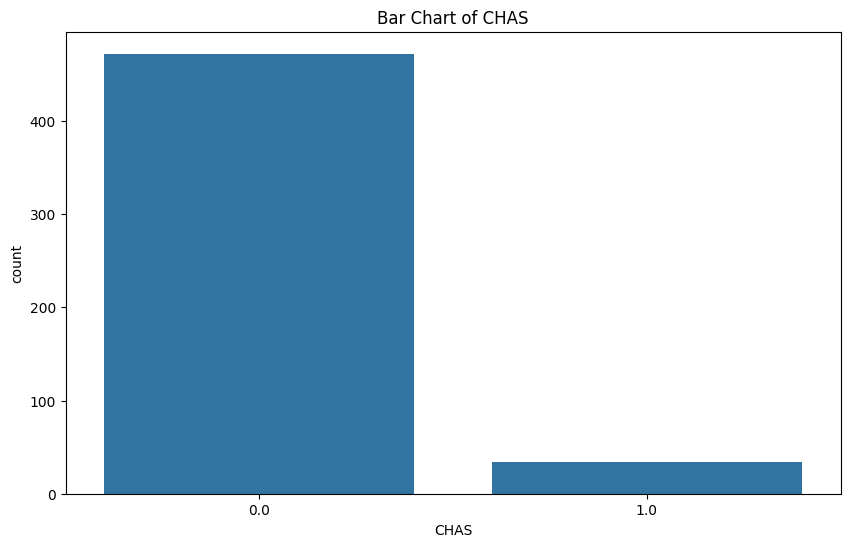

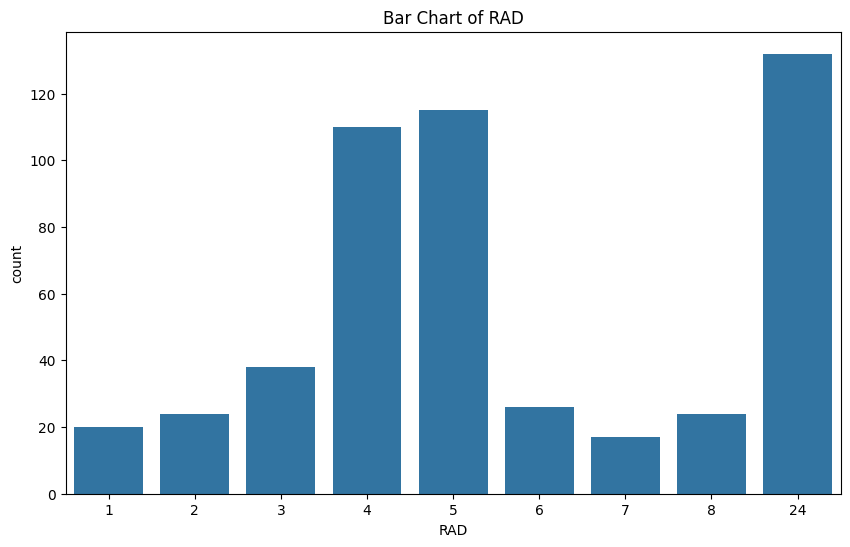

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Visualisation des variables catégorielles( 'CHAS' & 'RAD')

cols=['CHAS','RAD']
for col in cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col,data=data)
    plt.title(f'Bar Chart of {col}')
    plt.show()

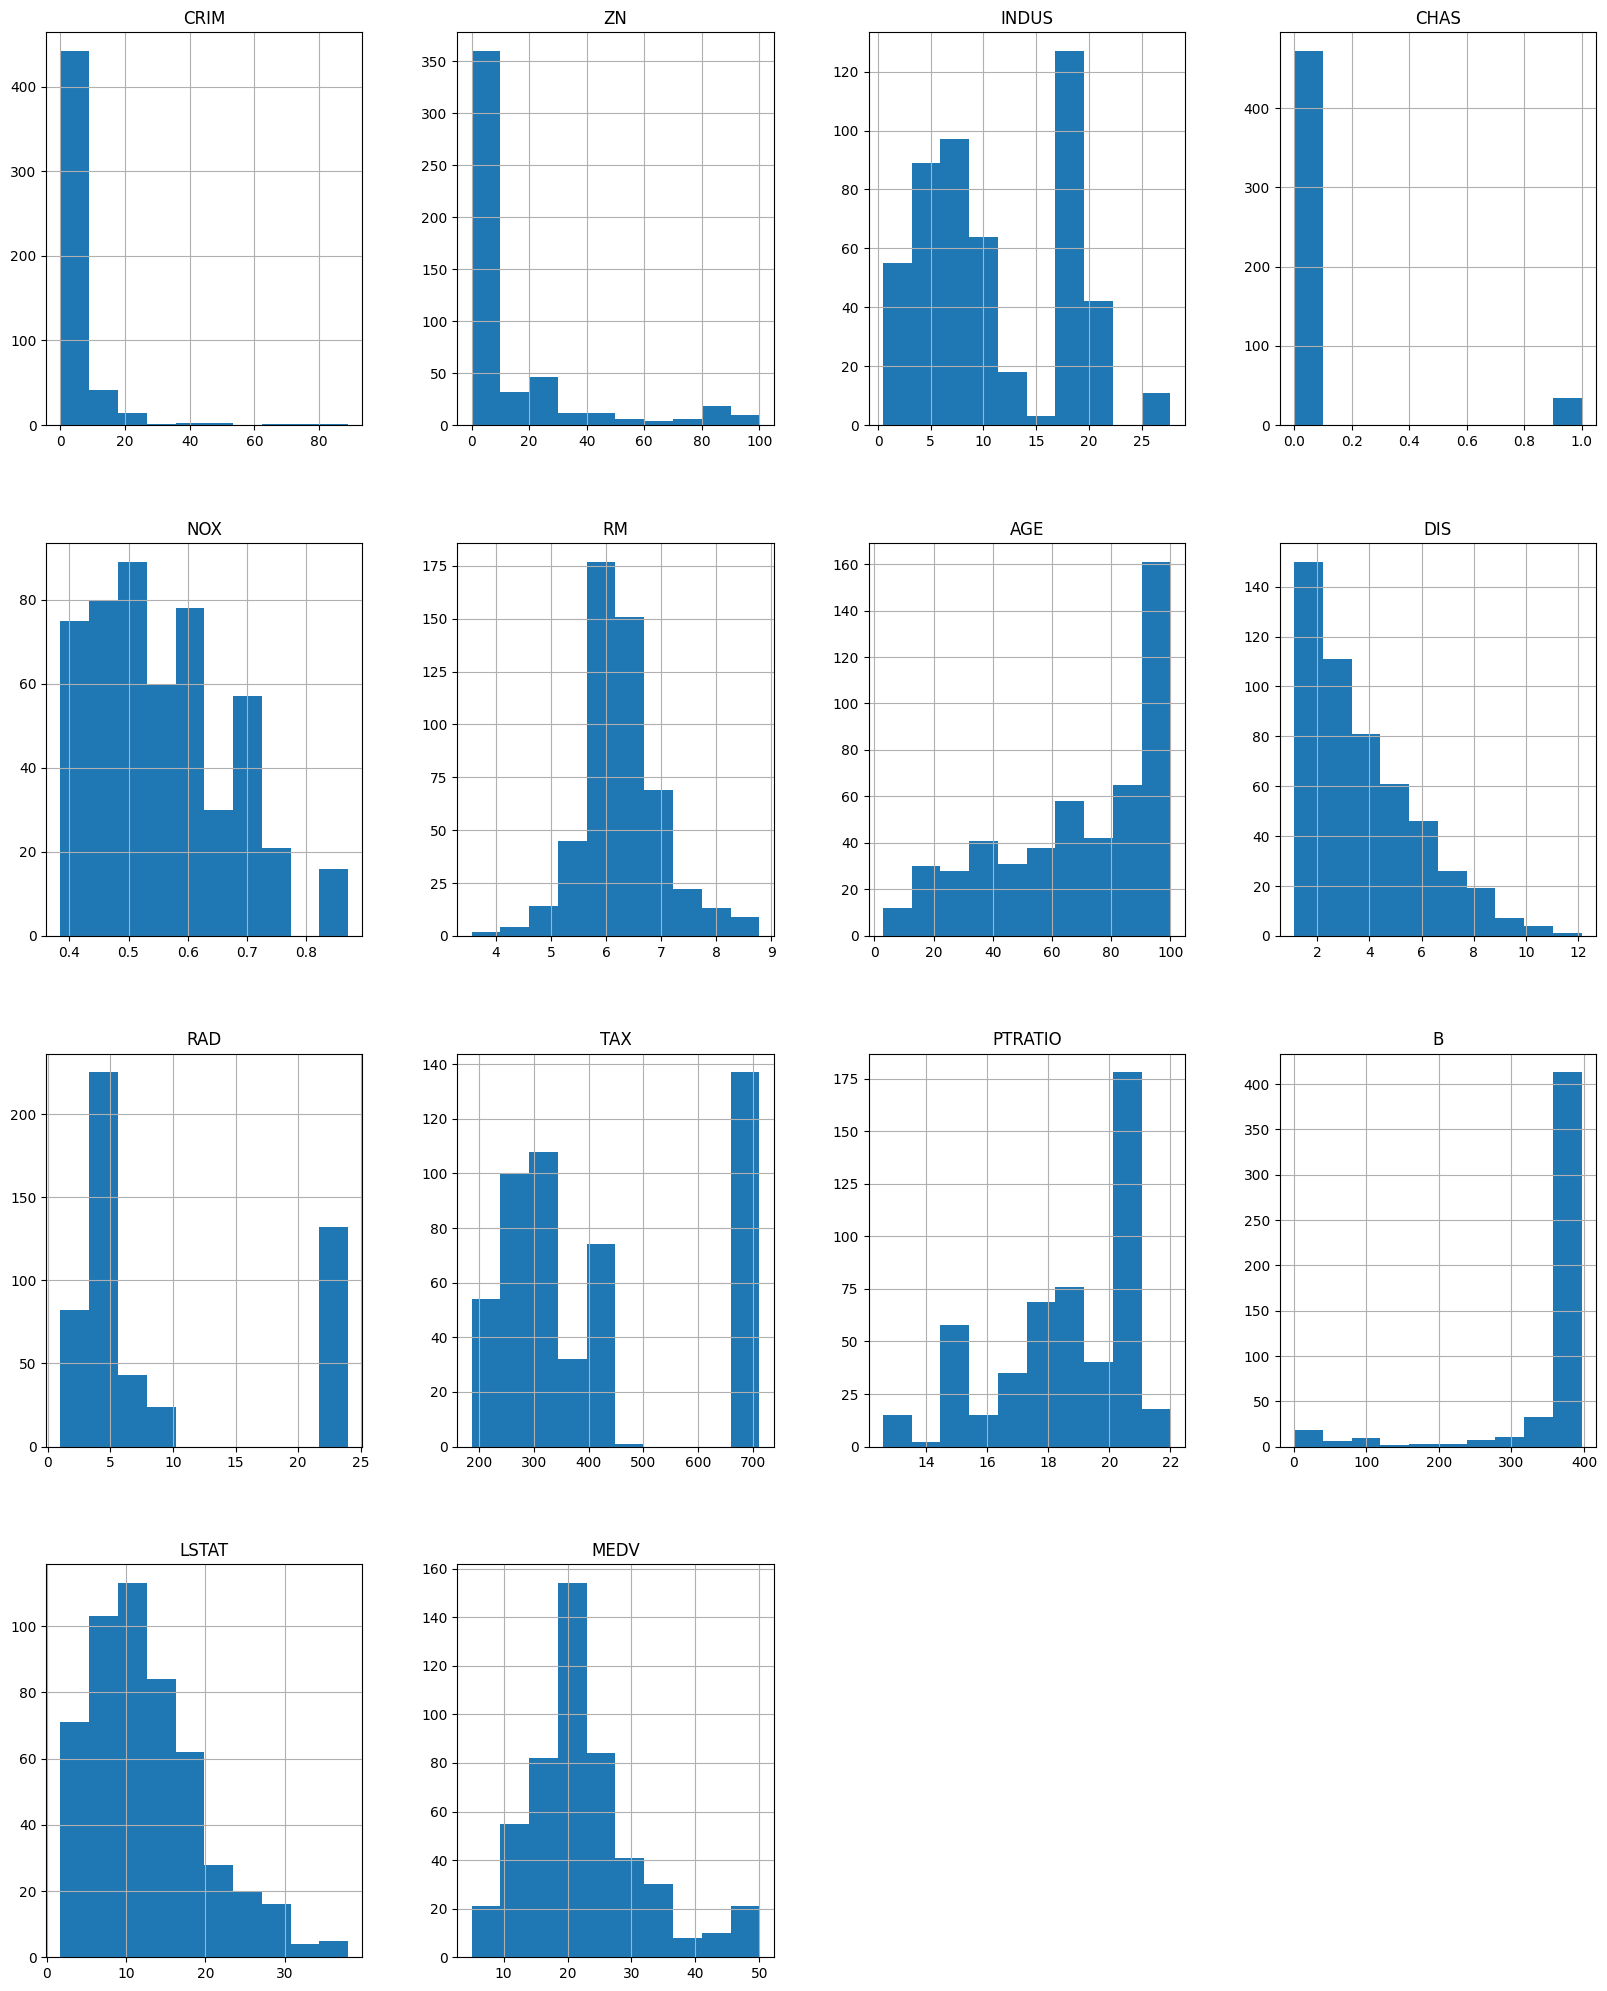

In [36]:
data.hist(figsize=(20,25))
plt.title('Histograms of variable du dataset')
plt.show()

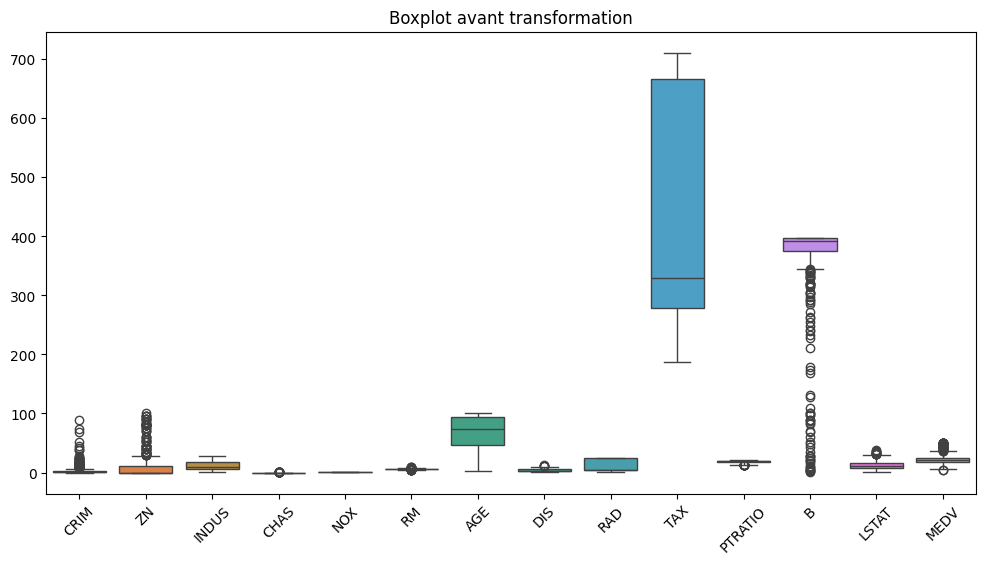

In [37]:
# Visualiser les données brutes 
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Boxplot avant transformation')
plt.xticks(rotation=45)
plt.show()

En suivant l'allure des variables sur le l'histogramme, nous constatons que l'ensemble des données présente une certaine asymétrie ce qui peut impacter négativement les perfomances du modèle. Donc, nous allons rémédier ce problème avec la technique log-transformation étant que donné que les colonnes numériques ont des valeurs positives. 

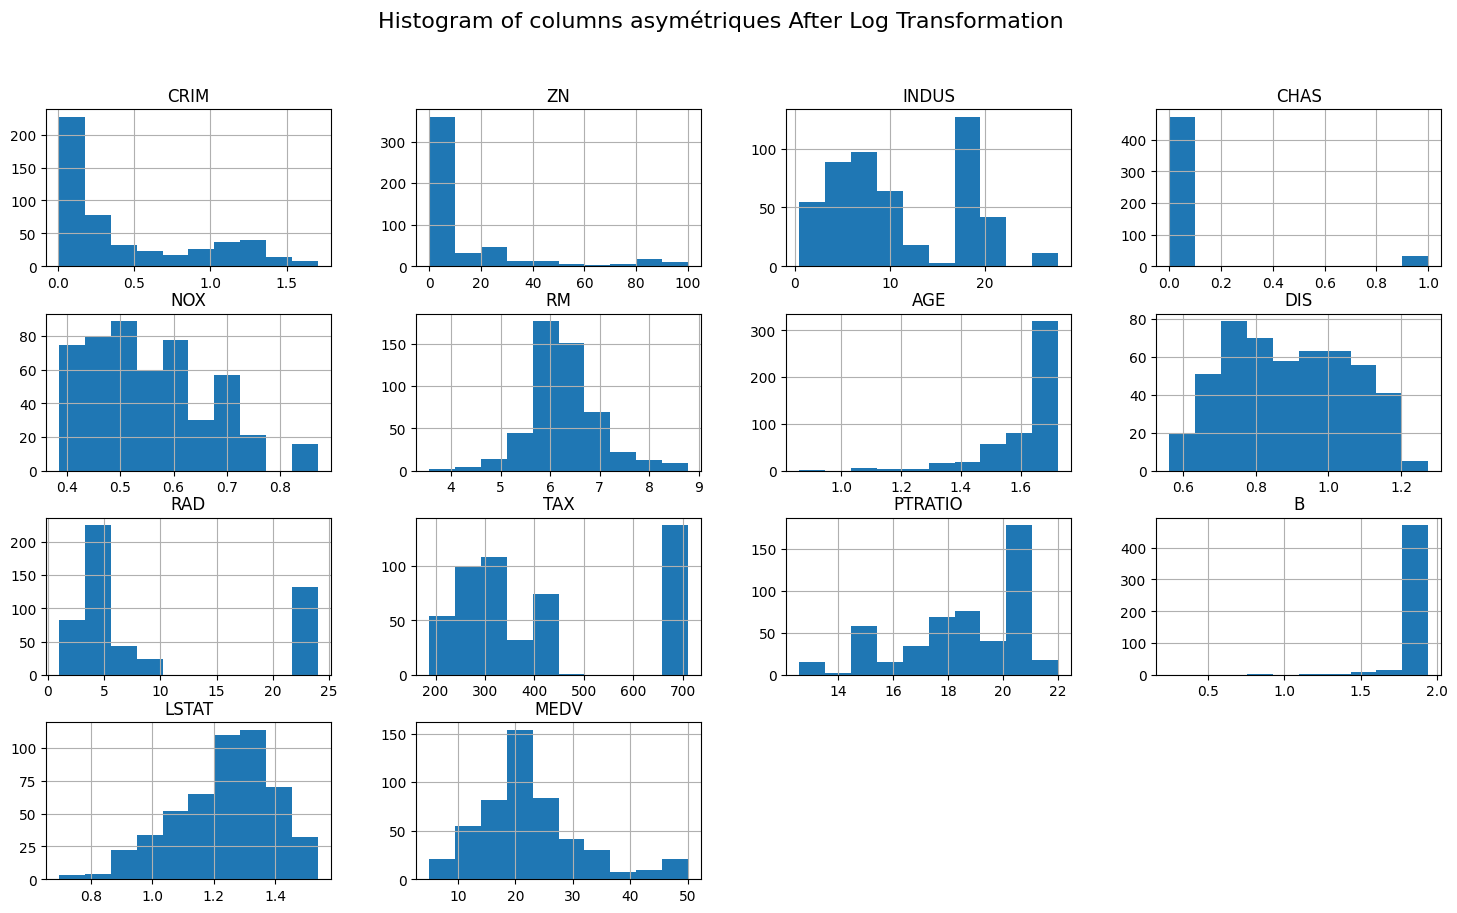

In [42]:
# Definir les colonnes asymétriques
cols_asy = ["AGE", "DIS", "CRIM", "LSTAT", "B"]

# Apply log1p transformation for better stability
for col in cols_asy:
    data[col] = np.log1p(data[col])  

# Plot histograms après log transformation
data.hist(figsize=(18, 10))
plt.suptitle("Histogram of columns asymétriques After Log Transformation", fontsize=16)
plt.show()

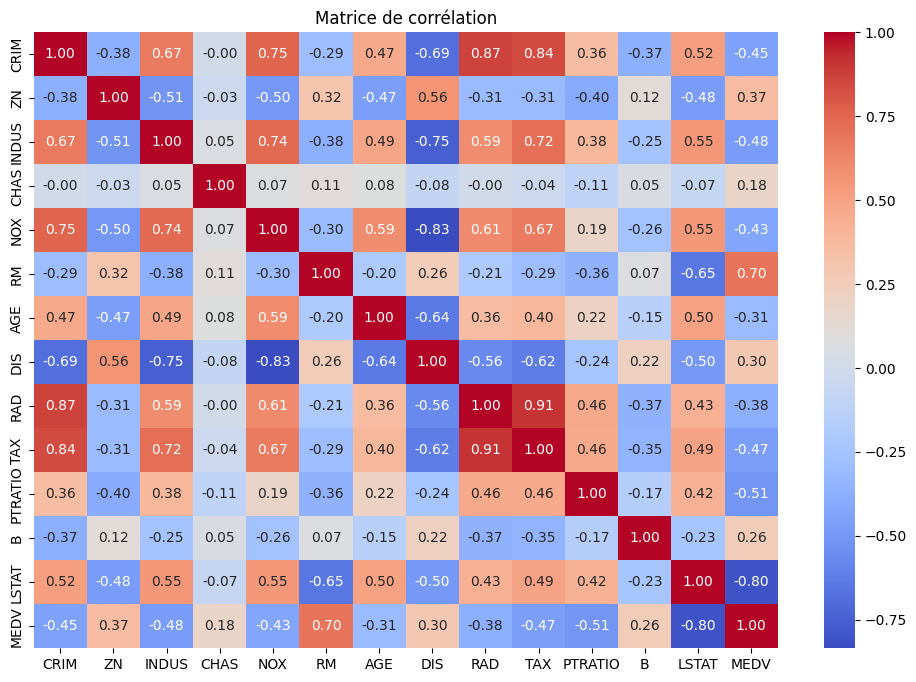

In [43]:
# Analyse des corrélations
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

In [44]:
# Outlier Analysis

Q1 = data.iloc[:,:-1].quantile(0.25)
Q3 = data.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5

# Determining the outlier boundaries.
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

outliers = ((data.iloc[:, :-1]< lower_bound) | (data.iloc[:, :-1]> upper_bound))

In [45]:
data[outliers.any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
18,0.463288,0.0,8.140000,0.0,0.538,5.456,1.531910,0.943083,4,307,21.0,1.897597,1.264357,20.2
25,0.476271,0.0,8.140000,0.0,0.538,5.599,1.697898,0.991940,4,307,21.0,1.904851,1.351385,13.9
27,0.513293,0.0,8.140000,0.0,0.538,6.047,1.704309,0.991858,4,307,21.0,1.906291,1.362465,14.8
32,0.626180,0.0,8.140000,0.0,0.538,5.950,1.689882,0.958367,4,307,21.0,1.864640,1.471840,13.2
34,0.673164,0.0,8.140000,0.0,0.538,6.096,1.719896,0.940088,4,307,21.0,1.874675,1.401327,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.941331,0.0,11.083992,0.0,0.655,5.952,1.695772,0.855964,24,666,20.2,1.419712,1.360636,19.0
467,0.989733,0.0,18.100000,0.0,0.584,6.003,1.715441,0.817227,24,666,20.2,1.917806,1.412323,19.1
475,1.098796,0.0,18.100000,0.0,0.584,6.162,1.720808,0.772431,24,666,20.2,1.904528,1.440514,13.3
489,0.155606,0.0,27.740000,0.0,0.609,5.414,1.722435,0.699906,4,711,20.1,1.923327,1.439284,7.0


## 4- Model development

In [46]:
# Split the dataset en train et test
from sklearn.model_selection import train_test_split

X = data.drop("MEDV", axis=1)  
y = data["MEDV"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Build trois modèles pour prédire le prix des maisons
models = {
    "LinearRegression":LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42)
}

# Etablir une boucle sur les modèles
for name, model in models.items():
    print(f"\n Entraînement du modèle : {name}")

    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)

    # Évaluation du modèle
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"\n Évaluation du modèle {name}:")
    print(f" MAE  : {mae:.4f}")
    print(f" RMSE : {rmse:.4f}")
    print(f" R²   : {r2:.4f}")
    print(f" MAPE : {mape:.2f}")


 Entraînement du modèle : LinearRegression

 Évaluation du modèle LinearRegression:
 MAE  : 2.7801
 RMSE : 4.3355
 R²   : 0.7437
 MAPE : 0.14

 Entraînement du modèle : Gradient Boosting

 Évaluation du modèle Gradient Boosting:
 MAE  : 1.9475
 RMSE : 2.7405
 R²   : 0.8976
 MAPE : 0.10

 Entraînement du modèle : Random Forest

 Évaluation du modèle Random Forest:
 MAE  : 2.0337
 RMSE : 2.7222
 R²   : 0.8990
 MAPE : 0.11


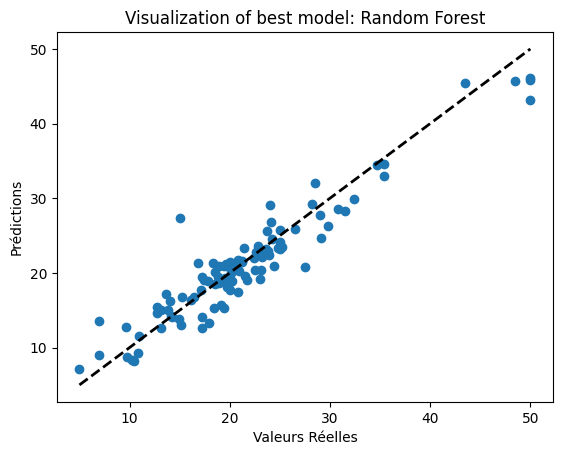

In [48]:
from turtle import st
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Valeurs Réelles')
ax.set_ylabel('Prédictions')
ax.set_title('Visualization of best model: Random Forest')
plt.show()